In [1]:
# compute RMS for images, first normalizing data to [0,1]

In [2]:
# load images for image analysis
import numpy as np
from thesis_v2.data.raw import load_data

In [3]:
imagenet8k_all = load_data('yuanyuan_8k_images', 'a')['images']
assert imagenet8k_all.shape == (8000, 400, 400)

In [4]:
imagenet8k_all.min(), imagenet8k_all.max()

(0, 255)

In [5]:
imagenet8k_all_normed = imagenet8k_all/255

In [6]:
np.percentile(imagenet8k_all_normed, [10,20])

array([0.22352941, 0.47058824])

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

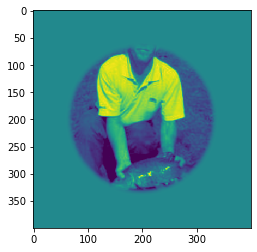

In [8]:
plt.imshow(imagenet8k_all_normed[0])

(array([   2.,    3.,   12.,   27.,   83.,  182.,  353.,  679., 1072.,
        1349., 1332., 1093.,  761.,  450.,  319.,  164.,   72.,   32.,
           9.,    6.]),
 array([ 89.84201875,  92.84727   ,  95.85252125,  98.8577725 ,
        101.86302375, 104.868275  , 107.87352625, 110.8787775 ,
        113.88402875, 116.88928   , 119.89453125, 122.8997825 ,
        125.90503375, 128.910285  , 131.91553625, 134.9207875 ,
        137.92603875, 140.93129   , 143.93654125, 146.9417925 ,
        149.94704375]),
 <a list of 20 Patch objects>)

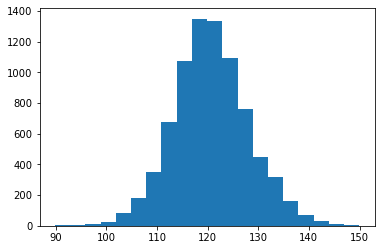

In [9]:
plt.hist(imagenet8k_all.mean(axis=(1,2)), bins=20)

In [10]:
deg_3_px = 126 # 25 px per deg.
deg_3_px_slice = slice(200-deg_3_px//2, 200+deg_3_px//2)
imagenet8k_all_normed_central_3_deg = imagenet8k_all_normed[:, deg_3_px_slice, deg_3_px_slice]

In [11]:
imagenet8k_all_normed_central_3_deg.shape

(8000, 126, 126)

(array([4.000e+00, 0.000e+00, 1.000e+00, 8.000e+00, 1.300e+01, 3.100e+01,
        5.700e+01, 1.100e+02, 2.860e+02, 4.830e+02, 9.810e+02, 1.786e+03,
        2.158e+03, 1.286e+03, 5.060e+02, 1.790e+02, 8.200e+01, 1.800e+01,
        6.000e+00, 5.000e+00]),
 array([0.13429495, 0.1463336 , 0.15837225, 0.1704109 , 0.18244955,
        0.19448821, 0.20652686, 0.21856551, 0.23060416, 0.24264281,
        0.25468147, 0.26672012, 0.27875877, 0.29079742, 0.30283608,
        0.31487473, 0.32691338, 0.33895203, 0.35099068, 0.36302934,
        0.37506799]),
 <a list of 20 Patch objects>)

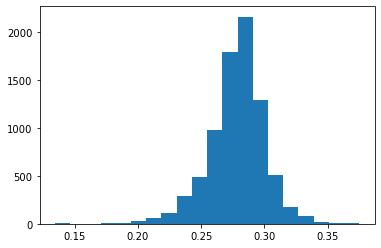

In [12]:
plt.hist(imagenet8k_all_normed_central_3_deg.std(axis=(1,2),ddof=0), bins=20)

In [13]:
inner_200px_slice = slice(200-200//2, 200+200//2)
imagenet8k_all_normed_inner_200 = imagenet8k_all_normed[:, inner_200px_slice, inner_200px_slice]

(array([1.000e+00, 6.000e+00, 1.000e+01, 6.200e+01, 1.390e+02, 4.010e+02,
        7.980e+02, 1.257e+03, 1.343e+03, 1.132e+03, 9.770e+02, 6.600e+02,
        4.570e+02, 3.100e+02, 1.980e+02, 1.170e+02, 6.500e+01, 4.000e+01,
        2.100e+01, 6.000e+00]),
 array([0.15355455, 0.16992802, 0.18630148, 0.20267495, 0.21904841,
        0.23542188, 0.25179535, 0.26816881, 0.28454228, 0.30091575,
        0.31728921, 0.33366268, 0.35003614, 0.36640961, 0.38278308,
        0.39915654, 0.41553001, 0.43190348, 0.44827694, 0.46465041,
        0.48102387]),
 <a list of 20 Patch objects>)

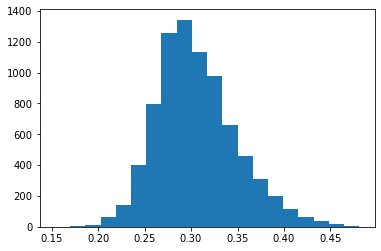

In [14]:
plt.hist(imagenet8k_all_normed_inner_200.std(axis=(1,2),ddof=0), bins=20)

In [15]:
imagenet8k_all_normed_inner_200.std(axis=(1,2)).mean()

0.30624587226784966

In [16]:
from modeling.data_utils import get_images


In [17]:
ns2250_all = get_images('tang', downsample=1, torch_format=False,
                       normalize=False)
assert ns2250_all.shape == (2250, 252, 252, 1)
ns2250_all = ns2250_all[:,:,:,0]
ns2250_all.min(), ns2250_all.max()

(0, 255)

In [18]:
ns2250_all_normed = ns2250_all/255

In [19]:
inner_148px_slice = slice(252-148//2, 252+148//2)
ns2250_all_normed_inner_148 = imagenet8k_all_normed[:, inner_148px_slice, inner_148px_slice]

In [20]:
ns2250_all_normed_inner_148.std(axis=(1,2)).mean()

0.27017796466124666

(array([   3.,    4.,   11.,   25.,   67.,  154.,  266.,  560.,  917.,
        1294., 1388., 1126.,  807.,  521.,  363.,  223.,  129.,   81.,
          45.,   16.]),
 array([0.05048869, 0.07108344, 0.0916782 , 0.11227295, 0.13286771,
        0.15346246, 0.17405722, 0.19465197, 0.21524673, 0.23584148,
        0.25643624, 0.27703099, 0.29762575, 0.3182205 , 0.33881526,
        0.35941001, 0.38000477, 0.40059952, 0.42119428, 0.44178903,
        0.46238379]),
 <a list of 20 Patch objects>)

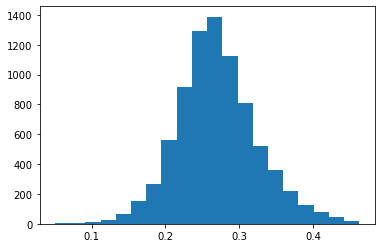

In [21]:
plt.hist(ns2250_all_normed_inner_148.std(axis=(1,2),ddof=0), bins=20)